# Theoretical Questions

### Q1: 
What could be some issues if the distribution of the test data is significantly different than the distribution of the training data?

In [3]:
# The issues associated with different distribution of the test and train data are:
#1. Test error would be high due to the model being biased on the train set or overfit to the train set

#The solution to this problem is to add weights to the training data in respect to the test data (mainly the 
#difference in the density distribution of the train and test data). We could also think about using cross validation.


### Q2:

What are some differences you would expect in a model that minimizes squared error, versus a model that minimizes absolute error? 

In which case would each error metric be appropriate?

In [2]:
# The model that minimizes the squared error focuses on the outliers or gives more weightage to the larger errors.

#MAE would be used when we want to give equal weights to all the errors, whereas when we want to give more weight 
#to big errors.


### Q3:

What error metric would you use to evaluate how good a binary classifier is?

What if the classes are imbalanced?

What if there are more than 2 groups?

In [3]:
# ---- Your Answer ---- #
#If it is a binary classifier, one should look into recall and precision. F1 score should be used which is calculated
#by looking at precision and recall.If the classes are imbalanced you should just change the weights of the f1score.
#If there are more than 2 groups once can look at the confusion matrix. 

### Q4: 

Why might it be preferable to include fewer predictors over many?


In [4]:
# ---- Your Answer ---- #
#Many predictors might result in overfitting.

# Programming Homework

### Question: Forest Cover Type Prediction

###### Focus: Multi-Class Classification

In the second part of this week's programming homework, you are tasked to develop a classification system to classify forest categories.

The interesting part of the dataset is that the predictors are all cartographic rather than remotely sensed data. 

Data is available at:  https://www.kaggle.com/c/forest-cover-type-prediction

* train.csv : the file provides both the predictors and response varaible
* test.csv  : the file provides predictors
* sampleSubmission.csv: the file provides the format that we expect you to provide

Your task:
* Understand and visualize the data collected by the US Forest Service
* Build a classifier which can accurately classify the forest cover

Hints:
* Always start with a data walk (i.e. visualization, data exploration) 
* Consider standardizing the predictors
* Always consider a simple model
* Consider feature engineering
* Always use Cross Validation to conduct model selection
* Pandas (a python package) has functions to deal with timestamps effectively





In [119]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [120]:
#functions
def soilcategory(value,soiltype):
    if value == 1:
        value = soiltype
    return value


In [121]:
#reading the file
read_file = pd.read_csv('train.csv', index_col = 'Id')
read_file_test = pd.read_csv('test.csv', index_col = 'Id')
read_file_test.dropna()
read_file.dropna()
read_file.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [122]:
#Feature Engineering
#changing the soiltypes and wilderness types as categories
for i in range(1,41):
    read_file['Soil_Type%s'%i] = read_file['Soil_Type%s'%i].apply(soilcategory, args = (i,))

for i in range(1,5):
    read_file['Wilderness_Area%s'%i] = read_file['Wilderness_Area%s'%i].apply(soilcategory, args = (i,))

for i in range(1,41):
    read_file_test['Soil_Type%s'%i] = read_file_test['Soil_Type%s'%i].apply(soilcategory, args = (i,))

for i in range(1,5):
    read_file_test['Wilderness_Area%s'%i] = read_file_test['Wilderness_Area%s'%i].apply(soilcategory, args = (i,))


In [123]:
read_file['soil_type'] = 0
for i in range(1,41):
    read_file['soil_type'] = read_file['soil_type'] + read_file['Soil_Type%s'%i]


read_file['wilderness_area'] = 0
for i in range(1,5):
    read_file['wilderness_area'] = read_file['wilderness_area'] + read_file['Wilderness_Area%s' %i]

read_file_test['soil_type'] = 0
for i in range(1,41):
    read_file_test['soil_type'] = read_file_test['soil_type'] + read_file_test['Soil_Type%s'%i]


read_file_test['wilderness_area'] = 0
for i in range(1,5):
    read_file_test['wilderness_area'] = read_file_test['wilderness_area'] + read_file_test['Wilderness_Area%s' %i]
    


In [124]:
for i in range(1,41):
    read_file = read_file.drop('Soil_Type%s'%i,1)

for i in range(1,5):
    read_file = read_file.drop('Wilderness_Area%s'%i,1)
    
for i in range(1,41):
    read_file_test = read_file_test.drop('Soil_Type%s'%i,1)

for i in range(1,5):
    read_file_test = read_file_test.drop('Wilderness_Area%s'%i,1)

In [127]:
read_file['soil_type'] = read_file['soil_type'].astype('category')
read_file['Cover_Type'] = read_file['Cover_Type'].astype('category')
read_file['wilderness_area'] = read_file['wilderness_area'].astype('category')

read_file_test['soil_type'] = read_file_test['soil_type'].astype('category')
read_file_test['wilderness_area'] = read_file_test['wilderness_area'].astype('category')


In [128]:
#Describing our data
read_file.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


In [129]:
#Finding the correlation between the features
read_file.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000


In [130]:
#Standardizing the data
read_file.iloc[:,0:10] = (read_file.iloc[:,0:10] - read_file.iloc[:,0:10].mean())/(read_file.iloc[:,0:10].max()-read_file.iloc[:,0:10].min())
read_file
read_file_test.iloc[:,0:10] = (read_file_test.iloc[:,0:10] - read_file_test.iloc[:,0:10].mean())/(read_file_test.iloc[:,0:10].max()-read_file_test.iloc[:,0:10].min())


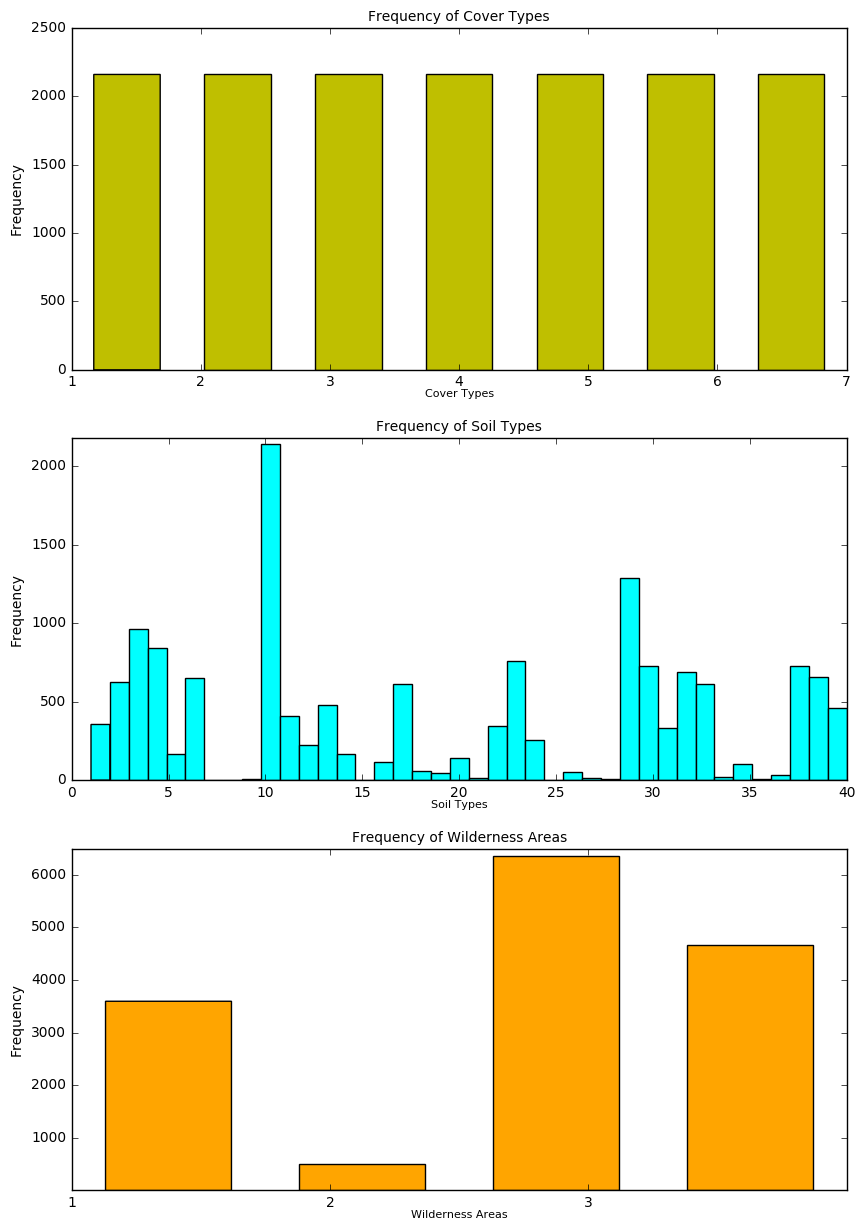

In [131]:
#Visualization of the categories
fig,ax = plt.subplots(nrows = 3, figsize = (10,15))
# fig.subplots_adjust(hspace = .5)

ax[0].hist(read_file['Cover_Type'], bins = 7, rwidth = 0.6, color = 'y')
ax[0].set_title('Frequency of Cover Types', fontsize = 10)
ax[0].set_xlabel('Cover Types', fontsize = 8, labelpad = 0)
ax[0].set_ylabel('Frequency')

ax[1].hist(read_file['soil_type'], bins = 40, rwidth = 1.5, color = 'cyan')
ax[1].set_title('Frequency of Soil Types', fontsize = 10)
ax[1].set_ylim(0,2180)
ax[1].set_xlim(0,40)
ax[1].set_xlabel('Soil Types', fontsize = 8, labelpad = 0)
ax[1].set_ylabel('Frequency')

ax[2].hist(read_file['wilderness_area'], bins = 4, rwidth = 0.65, color = 'orange')
ax[2].set_title('Frequency of Wilderness Areas', fontsize = 10)
ax[2].set_xlim(1,4)
ax[2].set_ylim(1,6500)
ax[2].set_xticks(np.arange(1,4,1))
ax[2].set_xlabel('Wilderness Areas', fontsize = 8, labelpad = 0)
ax[2].set_ylabel('Frequency')

plt.show()

# Looking Closely at Wilderness Areas

In [132]:
groupedby_wilderness_count = pd.DataFrame()
for value in read_file['Cover_Type'].unique():
    df = read_file[read_file['Cover_Type'] == value]
    n = len(read_file)
    groupedby_wilderness = df["Cover_Type"].groupby(df['wilderness_area'])
    groupedby_wilderness_count['%s'%value] = groupedby_wilderness.count()/n
groupedby_wilderness_count

,5,2,1,7,3,6,4
wilderness_area,,,,,,,
1,0.056614,0.075000,0.070238,0.036045,0.000000,0.000000,0.000000
2,0.000000,0.004365,0.011971,0.016667,0.000000,0.000000,0.000000
3,0.086243,0.062169,0.060648,0.090146,0.057077,0.063624,0.000000
4,0.000000,0.001323,0.000000,0.000000,0.085780,0.079233,0.142857


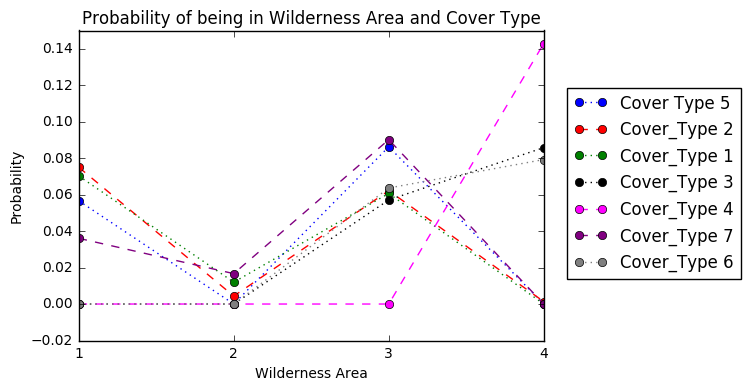

In [133]:
x = [1,2,3,4]
y = groupedby_wilderness_count['5']
plt.plot(x,y, linestyle = ':', marker = 'o',label = 'Cover Type 5')
plt.plot(x,groupedby_wilderness_count['2'], linestyle = '--',color = 'red', marker = 'o', label = 'Cover_Type 2')
plt.plot(x,groupedby_wilderness_count['1'], linestyle = ':',color = 'green', marker = 'o',label = 'Cover_Type 1')
plt.plot(x,groupedby_wilderness_count['3'], color = 'black', marker = 'o', linestyle = ':', label = 'Cover_Type 3')
plt.plot(x,groupedby_wilderness_count['4'], linestyle = '--',color = 'magenta', marker = 'o',label = 'Cover_Type 4')
plt.plot(x,groupedby_wilderness_count['7'], linestyle = '--',color = 'purple', marker = 'o',label ='Cover_Type 7')
plt.plot(x,groupedby_wilderness_count['6'], linestyle = ':',color = 'gray', marker = 'o',label ='Cover_Type 6')
plt.legend(loc=(1.05,0.2))
plt.xticks(np.linspace(1,4,4))
plt.title("Probability of being in Wilderness Area and Cover Type")
plt.ylim(-0.02,0.15)
plt.xlabel('Wilderness Area')
plt.ylabel('Probability')

In [134]:
#defining the features and results
col = [col for col in read_file.columns if col not in ['Cover_Type']]
X = read_file[col]
Y = read_file['Cover_Type']


In [135]:
#Data division into train data and test data
#Shuffling the indices
np.random.seed(2)
n = len(read_file)
indices = np.arange(n)
np.random.shuffle(indices)

#Dividing the indices
train_indices = indices[0:4*n//5]
test_indices = indices[4*n//5:n]

#Dividing the data
X_train_set = X.iloc[train_indices]
Y_train_set = Y.iloc[train_indices]
X_test_set = X.iloc[test_indices]
Y_test_set = Y.iloc[test_indices]

In [136]:
#Modeling 
#Logistic Regression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train_set,Y_train_set)
prediction = logreg.predict(X_test_set)

accuracy = accuracy_score(Y_test_set, prediction)
confusionmatrix = confusion_matrix(Y_test_set, prediction)
recall = recall_score(Y_test_set, prediction, average = 'macro')
precision = recall_score(Y_test_set, prediction, average = 'macro')

print "Accuracy of the model:",accuracy
print "\nConfusion Matrix:\n",confusionmatrix
print "\nRecall of the model:", recall
print "\nPrecision of the model:", precision

Accuracy of the model: 0.623346560847

Confusion Matrix:
[[193  77   1   0  46   6  80]
 [ 82 185  16   0 101  27  23]
 [  0   3 229  70  12 135   0]
 [  0   0  27 389   0  33   0]
 [ 14  74  57   0 241  25   0]
 [  0  16  77  58  31 271   0]
 [ 35   8   0   0   5   0 377]]

Recall of the model: 0.62189070955

Precision of the model: 0.62189070955


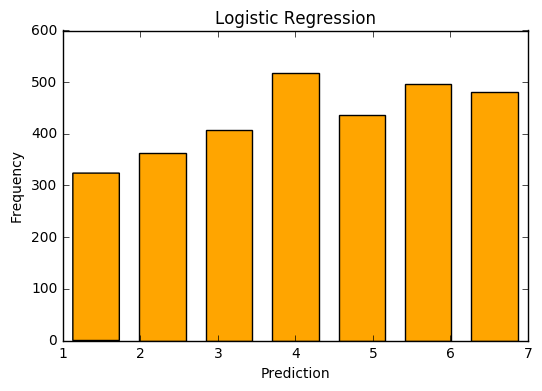

In [137]:
plt.hist(prediction, color = 'orange',bins = 7,rwidth = 0.7)
plt.xlabel("Prediction")
plt.xlim(1,7)
plt.ylabel("Frequency")
plt.title("Logistic Regression")

In [138]:
#Perceptron
perceptron = Perceptron()
perceptron.fit(X_train_set,Y_train_set)
prediction = perceptron.predict(X_test_set)

accuracy = accuracy_score(Y_test_set, prediction)
confusionmatrix = confusion_matrix(Y_test_set, prediction)
recall = recall_score(Y_test_set, prediction, average = 'macro')
precision = precision_score(Y_test_set, prediction, average = 'macro')

print "Accuracy of the model: %s",accuracy
print "\nConfusion Matrix:\n",confusionmatrix
print "\nRecall of the model: %s", recall
print "\nPrecision of the model: %s", precision

Accuracy of the model: %s 0.204695767196

Confusion Matrix:
[[  0   4   0   0 399   0   0]
 [  0   8   1   0 424   1   0]
 [  0   4  59  17 338  31   0]
 [  0   0  40 123 268  18   0]
 [  0   0  12   0 398   1   0]
 [  0   0  30  11 381  31   0]
 [  0   0   0   0 425   0   0]]

Recall of the model: %s 0.208654413153

Precision of the model: %s 0.322752807019


In [139]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_set,Y_train_set)
prediction = decision_tree.predict(X_test_set)

accuracy = accuracy_score(Y_test_set, prediction)
confusionmatrix = confusion_matrix(Y_test_set, prediction)
recall = recall_score(Y_test_set, prediction, average = 'macro')
precision = precision_score(Y_test_set, prediction, average = 'macro')

print "Accuracy of the model:",accuracy
print "\nConfusion Matrix:\n",confusionmatrix
print "\nRecall of the model:", recall
print "\nPrecision of the model:", precision


Accuracy of the model: 0.776455026455

Confusion Matrix:
[[274  90   0   0   9   2  28]
 [125 244   6   0  41  14   4]
 [  0  12 323  23  10  81   0]
 [  0   2  25 406   0  16   0]
 [  8  28   7   0 363   5   0]
 [  0  15  74  13   7 344   0]
 [ 24   7   0   0   0   0 394]]

Recall of the model: 0.776481877802

Precision of the model: 0.774790625306


In [140]:
#Support Vector Machine


In [141]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train_set,Y_train_set)
prediction = knn.predict(X_test_set)

accuracy = accuracy_score(Y_test_set, prediction)
confusionmatrix = confusion_matrix(Y_test_set, prediction)
recall = recall_score(Y_test_set, prediction, average = 'macro')
precision = precision_score(Y_test_set, prediction, average = 'macro')

print "Accuracy of the model:",accuracy
print "\nConfusion Matrix:\n",confusionmatrix
print "\nRecall of the model:", recall
print "\nPrecision of the model:", precision

Accuracy of the model: 0.78869047619

Confusion Matrix:
[[287  60   0   0  25   5  26]
 [101 231  11   1  68  15   7]
 [  0   8 301  35  12  93   0]
 [  0   0  14 424   0  11   0]
 [  3  11  11   0 380   6   0]
 [  1   0  65  22   8 357   0]
 [ 13   6   0   0   1   0 405]]

Recall of the model: 0.789244437316

Precision of the model: 0.785003821995


In [142]:
#XGBoost

In [143]:
#Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(X_train_set,Y_train_set)
prediction = randomforest.predict(X_test_set)

accuracy = accuracy_score(Y_test_set, prediction)
confusionmatrix = confusion_matrix(Y_test_set, prediction)
recall = recall_score(Y_test_set, prediction, average = 'macro')
precision = precision_score(Y_test_set, prediction, average = 'macro')

print "Accuracy of the model:",accuracy
print "\nConfusion Matrix:\n",confusionmatrix
print "\nRecall of the model:", recall
print "\nPrecision of the model:", precision

Accuracy of the model: 0.822751322751

Confusion Matrix:
[[305  60   1   0  10   0  27]
 [112 258   7   0  38  14   5]
 [  0   5 355  28   6  55   0]
 [  0   0  21 423   0   5   0]
 [  1  13   7   0 386   4   0]
 [  0   1  71  13   6 362   0]
 [ 24   2   0   0   0   0 399]]

Recall of the model: 0.823020937851

Precision of the model: 0.820727940039


In [150]:
#Predicting the test results
X_test_set = read_file_test
prediction = decision_tree.predict(X_test_set)
pd.DataFrame(prediction).to_csv("test_solution.csv",header = ['Result'])
print pd.DataFrame(prediction)

        0
0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      2
19      2
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      2
...    ..
565862  3
565863  3
565864  3
565865  3
565866  3
565867  3
565868  3
565869  3
565870  3
565871  3
565872  3
565873  3
565874  3
565875  3
565876  3
565877  3
565878  3
565879  3
565880  3
565881  3
565882  3
565883  3
565884  3
565885  3
565886  3
565887  3
565888  3
565889  3
565890  3
565891  3

[565892 rows x 1 columns]


## Prioject Homework

0. Create and turn in a "Product Requirement Document" that has these items in it.

1. Include 2 prioritized lists of requirements:

    * user requirements, mark items where you have low confidence
    * technical requirements, mark items where you have low confidence

2. Decide how you will validate user requirements which you are not sure about?

3. Decide how you will learn and test techcical challenges that you are not sure thatyou can achieve at this time.

4. Whiteboard or draw an architecture and/or data model based on what you know.  Take a picture of it and include it in the document

5. Make your list of what should be done in the next week, assign names to each item.

6. Insert your low tech demo picture (possibly modified) into this document

Turn in this document and also start a folder for your project and save it for your own review later.




## Extra Credit: Forecasting Bike Sharing Demand 

###### Focus: Regression and Feature Engineering

In this week's programming homework, you are tasked to develop a forecasting system for the use of a city bikeshare system. 

The question is based on a for-knowledge competition hosted on Kaggle: 
Reference: Fanaee-T, Hadi, and Gamo, Joao, Event labeling combining detectors and background knowledge, Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.

Data is available at: https://www.kaggle.com/c/bike-sharing-demand

3 files are provided:
* train.csv : the file provides both the predictors and response varaible
* test.csv  : the file provides predictors
* sampleSubmission.csv: the file provides the format that we expect you to provide

Your task:
* Understand and visualize the data generated by bike sharing systems
* Predict the number of total rentals in each time period during the test phase

Hints: 
* Always start with a data walk (i.e. visualization, data exploration) 
* Consider standardizing the predictors
* Always consider a simple model
* Consider feature engineering
* Always use Cross Validation to conduct model selection
* Pandas (a python package) has functions to deal with timestamps effectively


